# Task 1 - Exploratory Data Analysis

## Section 1 - Setup

%pip install pandas

In [ ]:
import pandas as pd

---

## Section 2 - Data loading

In [ ]:
# For Google Colab environment:

path = "https://cdn.theforage.com/vinternships/companyassets/e6nrxEAa6MHFh3Jmw/DCGoJxzfdJHirTYGe/1652216241761/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


For local environment:
Insert the file path in your computer
path = "D:\Data Analytics\Final Project DA40\sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

---

## Section 3 - Descriptive statistics
To gain an understanding of the dataset, let's first look at what columns and datatypes we have

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


Looking at the output of the `.info()` method, we can intepret each column as follows:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

We can see that there are 3 different datatypes within this dataset:

- object = this column contains categorical values
- float64 = this column contains floating point numerical values (i.e. decimal numbers)
- int64 = this column contains integer values (whole numbers)

Now let's compute some descriptive statistics of the numeric columns:

In [ ]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


---

## Section 4 - Visualisation

In [ ]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import seaborn as sns

In [ ]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
   _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
    num_unique_values = len(data[column].unique())
    value_counts = data[column].value_counts()
    print(f"Column: {column} has {num_unique_values} unique values\n")
    print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect:int = 2):
   _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f"Distribution of {column}");

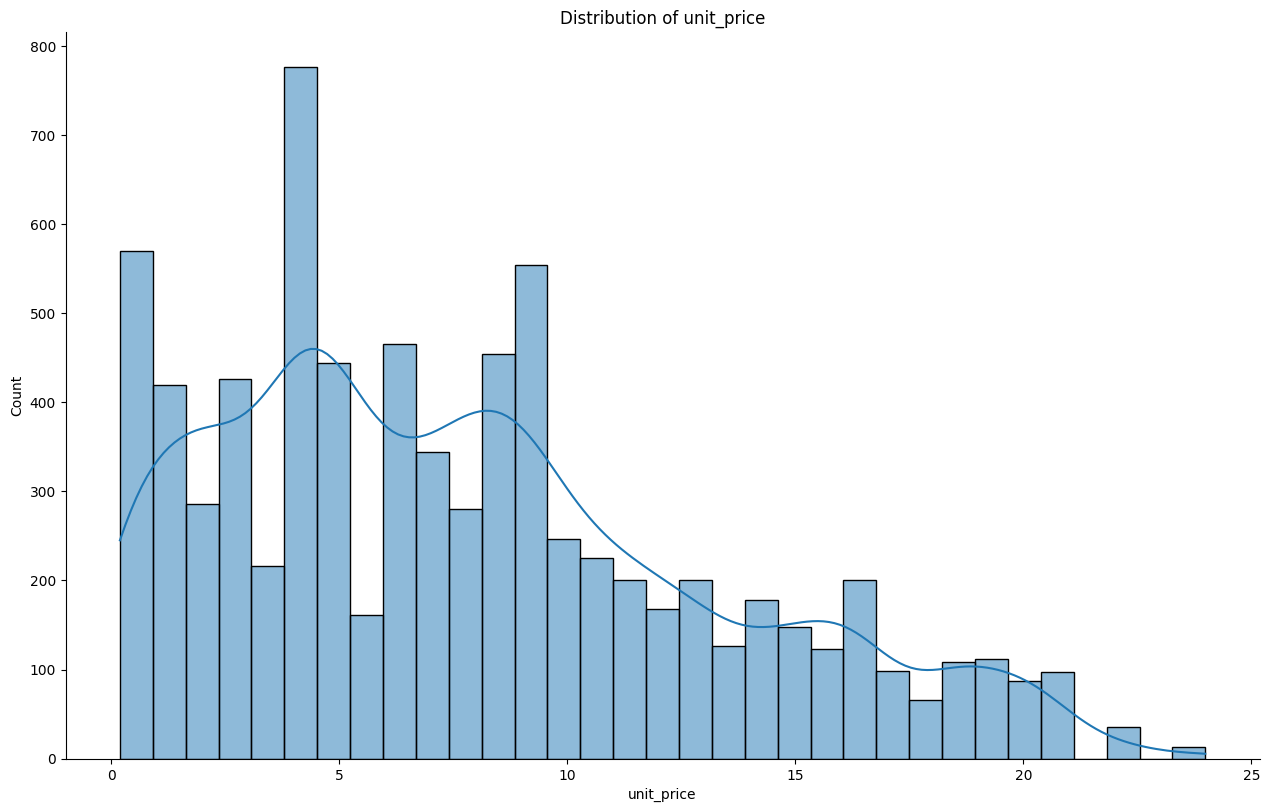

In [ ]:
plot_continuous_distribution(df, 'unit_price')

This tell us that the distribution of ``unit_price`` is positively skewed, that is, there are more sales of products with a low_unit_price compared to products with a high unit_price.

This make sense, you would expect a grocery store to sell more products that are cheap, and just a few products that are really expensive.

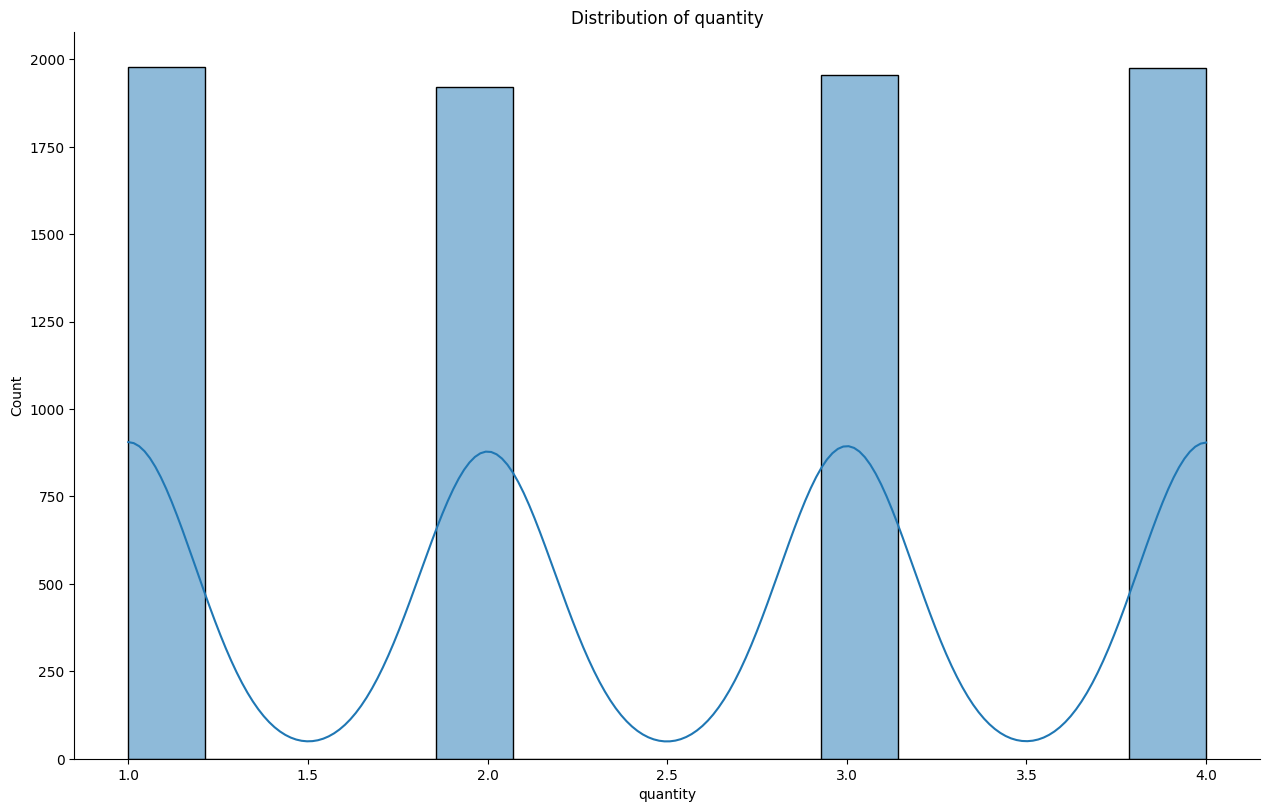

In [ ]:
plot_continuous_distribution(df, 'quantity')

The distribution of `quantity` is very different. We can see that only 4 unique values exist (1,2,3 and 4) and they are quite evenly distributed. It seems as though customers are buying in even quantities across 1 to 4 units.

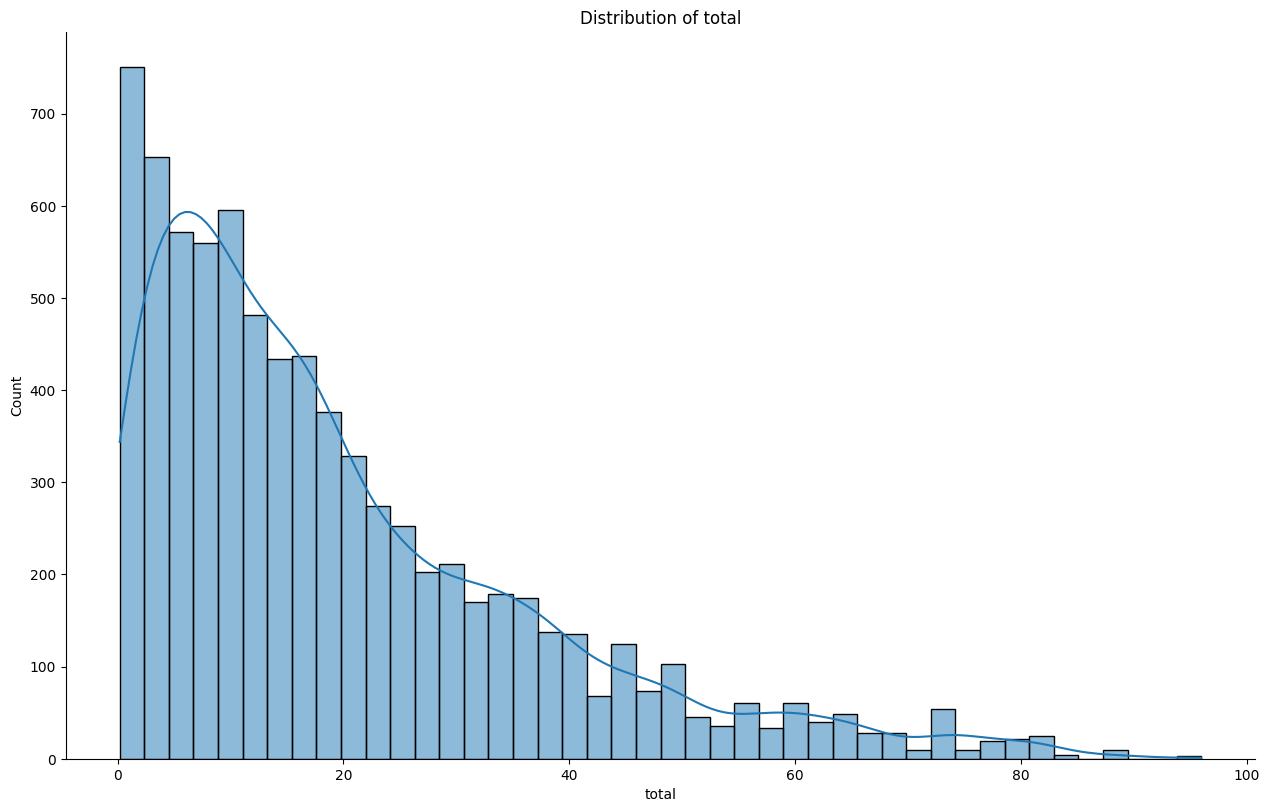

In [ ]:
plot_continuous_distribution(df, 'total')

The `total` follows a similar distribution to `unit_price`. This you may expect, as the total is calculated as `unit_price x quantity`.

However, this distribution is even more positively skewed. Once again, using intuition, this distribution makes sense. You'd expect customers at a grocery store to generally make more transactions of low values and only occasionally make a transaction of a very high value.

Now let's turn our attention to the categorial columns within the dataset.

Before visualising these columns, it is worth us understanding how many unique values these columns have. If a categorical column has 1000's of unique value, it will be very difficult to visualise.

In [ ]:
get_unique_values(df, 'transaction_id')

Column: transaction_id has 7829 unique values

transaction_id
a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    1
6532e258-95fd-4eb5-8c67-2bfb879a8fec    1
6fce2af3-47a0-4755-99c9-0cefb5ab6f41    1
6476e388-3990-471f-b415-3ee59ae18832    1
10afe89b-c45b-49a2-b0be-dec89a4c3f80    1
                                       ..
a9abe5ac-99d5-4d8b-bbbd-c2a207642849    1
6b0b23e8-412b-4665-8cc4-3e37f0d9e195    1
711a4162-1985-4f5a-94ca-137cfacaeadf    1
7d1e9010-dbaf-4770-a467-f31477910f7a    1
afd70b4f-ee21-402d-8d8f-0d9e13c2bea6    1
Name: count, Length: 7829, dtype: int64


`transaction_id` is  a unique ID column for each transaction. Since each row reptrsents a unique transaction, this means that we have 7829 unique transaction IDs. Therefore, this column is not useful to visualise.

In [ ]:
get_unique_values(df, 'product_id')

Column: product_id has 300 unique values

product_id
ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
ec0bb9b5-45e3-4de8-963d-e92aa91a201e      3
Name: count, Length: 300, dtype: int64


`product_id` is an ID column, it is unique based on the product that was sold within the transaction. We can see that we have 00 unique product IDs, hence 300 unique products within the dataset.
From the output of the helper function, we can see that the product most frequently was sold within the dataset was `ecac012c-1dec-41d4-9ebd-56fb7166f6d9`, sold 11 times during the week. Whereas the product least sold was `ec0bb9b5-45e3-4de8-963d-e92aa91a201e` sold just 3 times.

In [ ]:
get_unique_values(df, 'category')

Column: category has 22 unique values

category
fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: count, dtype: int64


There are 22 unique values for `category`, with `fruit` and `vegetables` being the 2 most frequently purchased product categories and `spices and herbs` being the least.

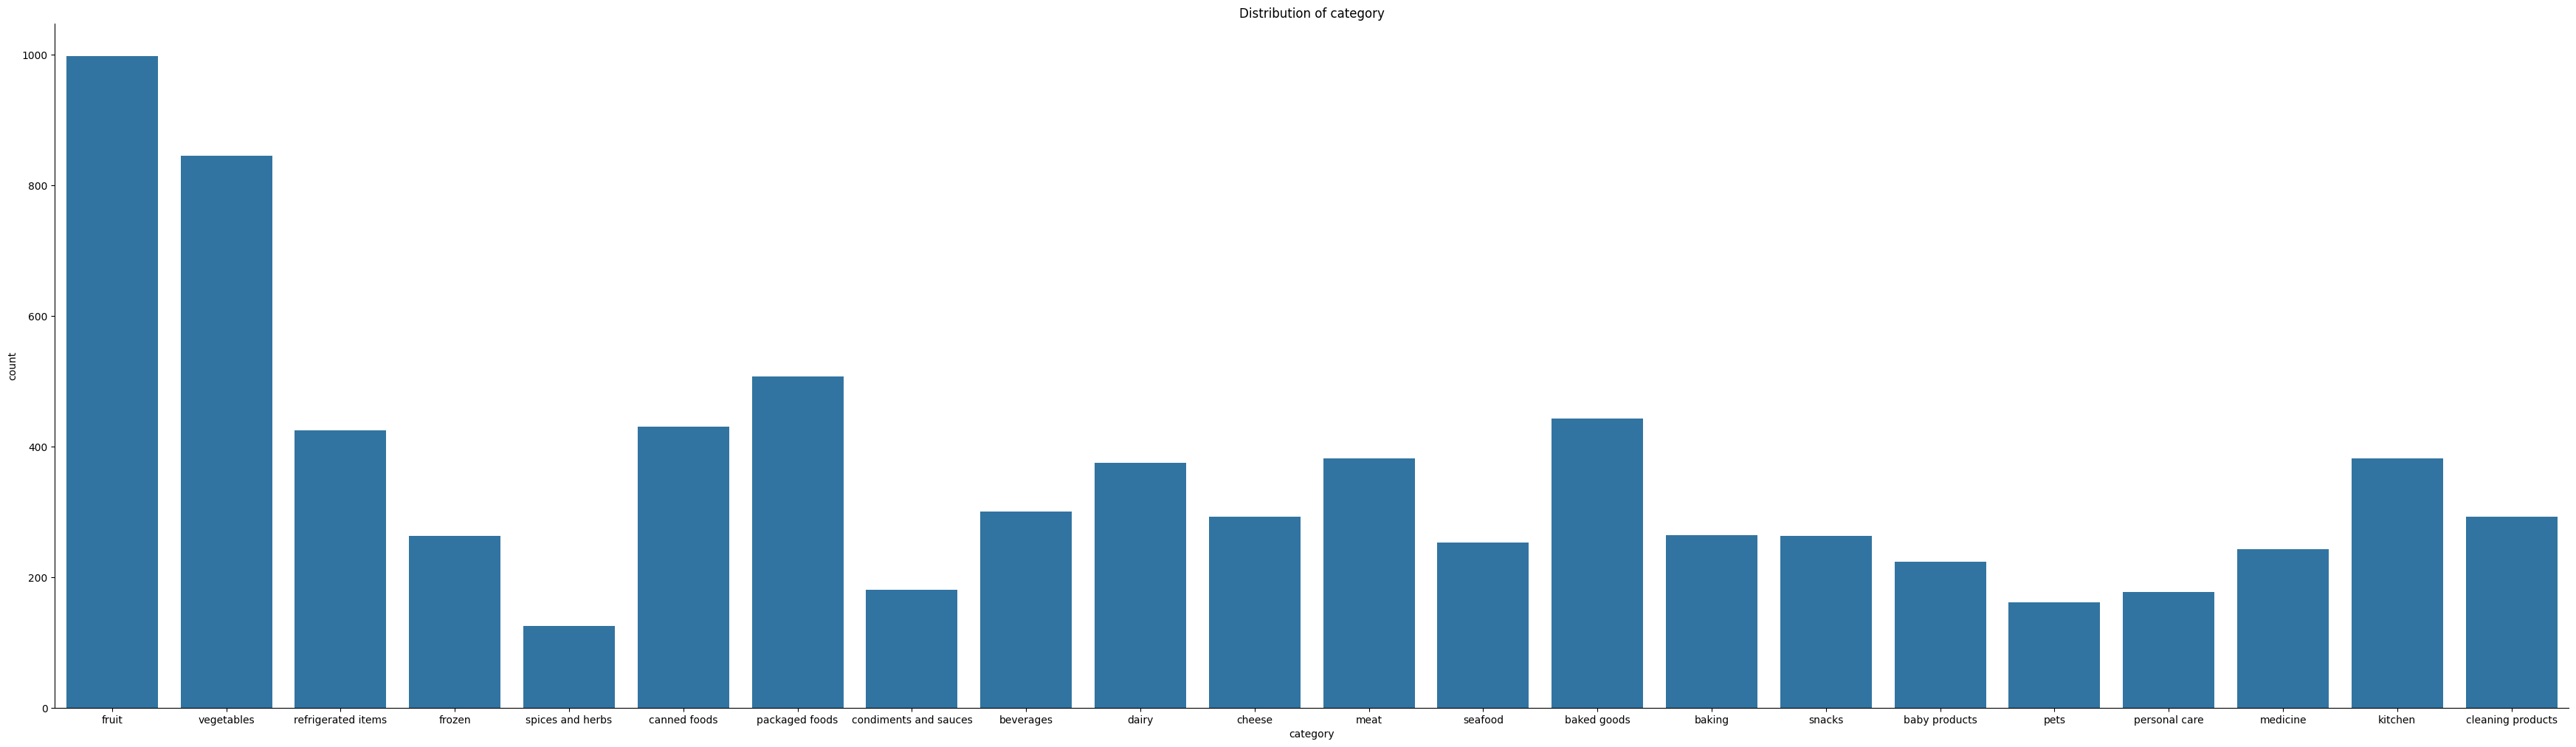

In [ ]:
plot_categorical_distribution(df, 'category', height=10, aspect=3.5)

In [ ]:
get_unique_values(df, 'customer_type')

Column: customer_type has 5 unique values

customer_type
non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: count, dtype: int64


There are 5 unique values for `customer_type`, and they seem to be evenly distributed.

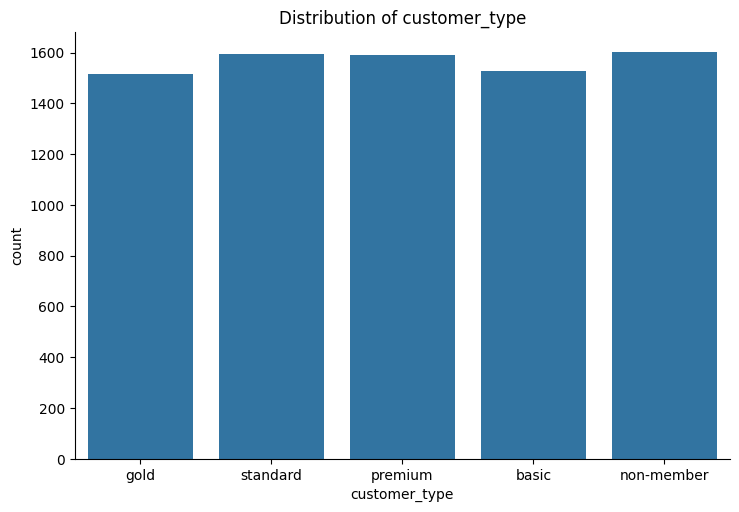

In [ ]:
plot_categorical_distribution(df, 'customer_type', height=5, aspect=1.5)

From this sample of data, non-member appear to be the most frequent type of customers, closely followed by standard and premium customers.

In [ ]:
get_unique_values(df, 'payment_type')

Column: payment_type has 4 unique values

payment_type
cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: count, dtype: int64


There are 4 unique values for `payment_type`, and they seem to be quite evenly distributed once again.

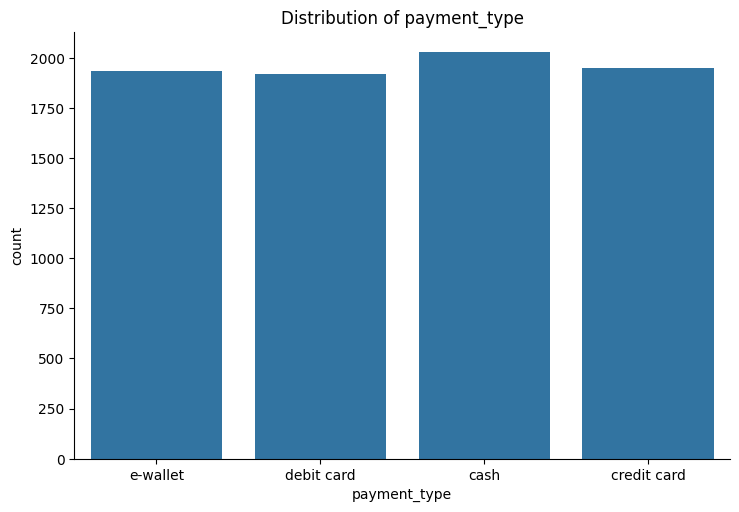

In [ ]:
plot_categorical_distribution(df, 'payment_type', height=5, aspect=1.5)

Cash seems to be the most frequently used method of pay ment from this sample of data, with debit cards being the least frequent.

In [ ]:
get_unique_values(df, 'timestamp')

Column: timestamp has 7738 unique values

timestamp
2022-03-02 19:32:20    2
2022-03-05 10:11:33    2
2022-03-01 18:12:17    2
2022-03-03 13:28:14    2
2022-03-07 17:13:29    2
                      ..
2022-03-01 10:00:58    1
2022-03-02 11:05:58    1
2022-03-04 17:48:49    1
2022-03-04 14:53:27    1
2022-03-06 13:50:36    1
Name: count, Length: 7738, dtype: int64


There are 7739 unique values of `timestamp`. There a lot of unique values for the timestamp column.
The column named `timestamp` appears to be categorical, but in fact it is not. This is a datetime. Therefore, we must transform this column to a datetime column.

In [ ]:
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):
    dummy = data.copy()
    dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
    return dummy

In [ ]:
df = convert_to_datetime (df, 'timestamp')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


We can see that the timestamp is now of type `datetime64[ns]`. We can explode datetime in to `hour`:

In [ ]:
df['hour'] = df['timestamp'].dt.hour

In [ ]:
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,hour
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,9
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,10
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,17
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,17
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,14


In [ ]:
get_unique_values(df, 'hour')

Column: hour has 11 unique values

hour
11    738
16    730
18    727
10    723
12    721
9     718
19    709
14    702
17    699
13    693
15    669
Name: count, dtype: int64


From this we can see that the 11th, 16th, 18th hour of the day are the top 3 hours for transactions being processed. This would suggest that their busiest times of day may be just before lunch, and as people are on the way home from work.

---
## Section 5 - Summary

The client wants to know:

`"How to better stock the items that they sell"`

### Understanding the client's question

The client wants to know how to better stock the items they sell. We can answer this question based on the provided information about the grocery store's sales data, but with some limitations.

### Analyzing the data

* **Distribution of prices and quantities:**
    * **unit_price:** Positively skewed with more sales for cheaper products.
    * **quantity:** Almost uniform distribution with 1-4 units bought equally often.
    * **total:** Even more positively skewed than unit_price, indicating more transactions with lower totals.
* **Categorical variables:**
    * **product_id:** 300 unique products, with one product sold 11 times and another just 3 times.
    * **category:** 22 unique categories, with "fruit" and "vegetables" most popular and "spices and herbs" least popular.
    * **customer_type:** 5 evenly distributed types, with non-member slightly more frequent.
    * **payment_type:** 4 evenly distributed types, with cash most frequent and debit card least frequent.
    * **timestamp:** Lots of unique values suggesting a datetime format, with busiest hours around 11th, 16th, and 18th of the day.

### Limitations and next steps

* **Data limitations:**
    * **Sample size:** Only 1 week of data from 1 store, making insights unreliable.
    * **Problem statement lacking specificity:** The current "better stocking" goal is too broad.
    * **Feature limitations:** More features relevant to the specific problem might be needed.
* **Recommendations:**
    * **Gather more data:** Collect data from multiple stores and a longer period to gain statistically significant insights.
    * **Refine the problem statement:** Define a specific goal like optimizing stock for peak hours or predicting demand for high-value items.
    * **Explore additional features:** Gather data on factors like promotions, weather, or competitor activity to inform stocking decisions.

By following these steps, the client can gather more relevant data, define a clear problem statement, and leverage advanced analysis techniques to optimize their inventory management and ultimately, improve their business.

### Conclusion

While the provided data gives us some insights into the grocery store's sales patterns, it's not enough to effectively answer the client's question. By taking the mentioned steps to address the limitations, we can provide them with more actionable advice and help them achieve their inventory management goals.

----

# Task 2 - Modeling

Based on our recommendations, they want to focus on the following problem statement:

``“Can we accurately predict the stock levels of products based on sales data and sensor data on an hourly basis in order to more intelligently procure products from our suppliers?” ``

The client has agreed to share more data in the form of sensor data. They use sensors to measure temperature storage facilities where products are stored in the warehouse, and they also use stock levels within the refrigerators and freezers in store.


## Section 1 - Data loading

We're going to load 3 datasets.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
path_sales = "https://cdn.theforage.com/vinternships/companyassets/e6nrxEAa6MHFh3Jmw/DCGoJxzfdJHirTYGe/1652212400513/sales.csv"

sales_df = pd.read_csv(path_sales)
sales_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
path_sensor_stock_levels = "https://cdn.theforage.com/vinternships/companyassets/e6nrxEAa6MHFh3Jmw/DCGoJxzfdJHirTYGe/1652212438184/sensor_stock_levels.csv"

stock_df = pd.read_csv(path_sensor_stock_levels)
stock_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [ ]:
path_sensor_storage_temperature = "https://cdn.theforage.com/vinternships/companyassets/e6nrxEAa6MHFh3Jmw/DCGoJxzfdJHirTYGe/1652212467098/sensor_storage_temperature.csv"

temp_df = pd.read_csv(path_sensor_storage_temperature)
temp_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


----
## Section 3 - Data Cleaning

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [ ]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2   product_id           15000 non-null  object 
 3   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 468.9+ KB


In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           23890 non-null  object 
 1   timestamp    23890 non-null  object 
 2   temperature  23890 non-null  float64
dtypes: float64(1), object(2)
memory usage: 560.0+ KB


Everything looks fine but the `timestamp` column in each dataset. We need to convert that column to correctly type.

In [ ]:
def convert_to_datetime (data: pd.DataFrame = None, column: str = None):

    dummy = data.copy()
    dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
    return dummy

In [ ]:
sales_df = convert_to_datetime(sales_df, 'timestamp')
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [ ]:
stock_df = convert_to_datetime(stock_df, 'timestamp')
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   15000 non-null  object        
 1   timestamp            15000 non-null  datetime64[ns]
 2   product_id           15000 non-null  object        
 3   estimated_stock_pct  15000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 468.9+ KB


In [ ]:
temp_df = convert_to_datetime(temp_df, 'timestamp')
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           23890 non-null  object        
 1   timestamp    23890 non-null  datetime64[ns]
 2   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 560.0+ KB


----
## Section 4 - Merge data

Currently we have 3 datasets. In order to include all of this data within a predictive model, we need to merge them together into 1 dataframe.

The client indicaté that they want the model to predict pn an hourly basis. Looking at the data model, we can see that only column that we can use to merge the 3 datasets is `timestamp`.

So, we must first transform the `timestamp` column in all 3 datasets.

In [ ]:
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
from datetime import datetime

def convert_timestamp_to_hourly(data: pd.DataFrame = None, column: str = None):
  dummy = data.copy()
  new_ts = dummy[column].tolist()
  new_ts = [i.strftime('%Y-%m-%d %H:00:00') for i in new_ts]
  new_ts = [datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_ts]
  dummy[column] = new_ts
  return dummy

In [ ]:
sales_df = convert_timestamp_to_hourly(sales_df, 'timestamp')
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
stock_df = convert_timestamp_to_hourly(stock_df, 'timestamp')
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [ ]:
temp_df = convert_timestamp_to_hourly(temp_df, 'timestamp')
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


Now we can see all of the `timestamp` columns have had the minutes and seconds reduced to `00`.

The next thing to do is to aggregate the datasets in order to combine rows which have the same value for `timestamp`.

For the `sales` data,  we want to group the data by `timestamp` but also by `product_id`. When we aggregate, we must choose which columns to aggregate by the grouping. For now, let's aggregate quantity.



In [ ]:
sales_agg = sales_df.groupby(['timestamp', 'product_id']).agg({'quantity': 'sum'}).reset_index()
sales_agg.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11


We now have an aggregated sales data where each row represents a unique combination of hour during which the sales took place from that weeks worth of data and the product_id. We summed the quantity and took the mean average of the unit_price.

For the stock data, we want to group it in the same way and aggregate the `estimated_stock_pct`.


In [ ]:
stock_agg = stock_df.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


This shows us the average stock percentage of each product at unique hours within the week of sample data.

Finally, for the temperature data, product_id does not exist in this table, so we simply need to group by timestamp and aggregate the `temperature`.

In [ ]:
temp_agg = temp_df.groupby(['timestamp']).agg({'temperature': 'mean'}).reset_index()
temp_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734


This gives us the average temperature of the storage facility where the produce is stored in the warehouse by unique hours during the week. Now, we are ready to merge our data. We will use the `stock_agg` table as our base table, and we will merge our other 2 tables onto this.

In [ ]:
merged_df = stock_agg.merge(sales_agg, on=['timestamp', 'product_id'], how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN


In [ ]:
merged_df = merged_df.merge(temp_agg, on='timestamp', how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 423.8+ KB


We can see from the `.info()` method that we have some null values. These need to be treated before we can build a predictive model. The column that features some bull values is `quantity`. We can assume that if there is a null value for this column, it represents that there were 0 sales of this product within this hour. So, lets fill this columns null values with 0, however, we should verify this with the client, in oder to make sure we're not making any assumptions by filling these null values with 0.

In [ ]:
merged_df['quantity'] = merged_df['quantity'].fillna(0)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 423.8+ KB


We're going to combine some more features onto this table too, including `category` and `unit_price`.

In [ ]:
product_categories = sales_df[['product_id', 'category']]
product_categories = product_categories.drop_duplicates()

product_price = sales_df[['product_id', 'unit_price']]
product_price = product_price.drop_duplicates()

In [ ]:
merged_df = merged_df.merge(product_categories, on="product_id", how="left")
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets


In [ ]:
merged_df = merged_df.merge(product_price, on="product_id", how="left")
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
 5   category             10845 non-null  object        
 6   unit_price           10845 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 593.2+ KB


----
##Section 5 - Featureing engineering

Now we must transform this data so that the columns are in a suitable format for a machine learning model. In order terms, every column must be numberic. There are some models that will accept categorical features, but for this model we will use a model that requires numberic features.

Let's first engineer the `timestamp` column. In it's current form, it is not very useful for a machine learning model. Since it;s a datetime datatype, we can explode this column into day of week, day off month, and hour to name a few.

In [ ]:
merged_df['timestamp_day_of_month'] = merged_df['timestamp'].dt.day
merged_df['timestamp_day_of_week'] = merged_df['timestamp'].dt.dayofweek
merged_df['timestamp_hour'] = merged_df['timestamp'].dt.hour
merged_df.drop(columns=['timestamp'], inplace=True)

merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,1,1,9
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49,1,1,9
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19,1,1,9
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19,1,1,9
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19,1,1,9


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_id              10845 non-null  object 
 1   estimated_stock_pct     10845 non-null  float64
 2   quantity                10845 non-null  float64
 3   temperature             10845 non-null  float64
 4   category                10845 non-null  object 
 5   unit_price              10845 non-null  float64
 6   timestamp_day_of_month  10845 non-null  int32  
 7   timestamp_day_of_week   10845 non-null  int32  
 8   timestamp_hour          10845 non-null  int32  
dtypes: float64(4), int32(3), object(2)
memory usage: 635.6+ KB


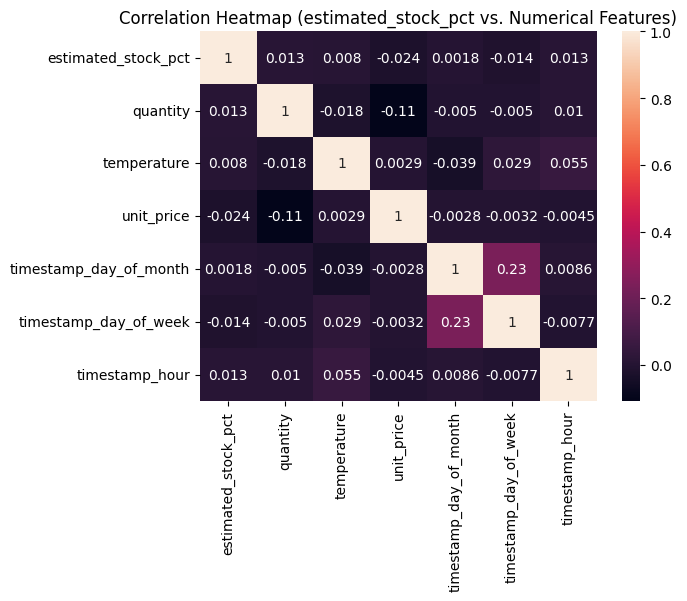

In [ ]:
numeric_df = merged_df.select_dtypes(include=["number"])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap (estimated_stock_pct vs. Numerical Features)")
plt.show()

The next column that we can engineer is the `category` column. In its current form it is categorical. We can convert it into numberic by creating dummy variables from this categorical column.

In [ ]:
merged_df = pd.get_dummies(merged_df, columns=['category'])
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11.19,1,1,9,False,False,...,False,False,False,False,False,False,False,False,False,False
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,1.49,1,1,9,False,False,...,False,False,False,False,False,False,False,False,False,True
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,14.19,1,1,9,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,20.19,1,1,9,False,False,...,False,False,False,False,False,False,False,False,False,False
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,8.19,1,1,9,False,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   product_id                      10845 non-null  object 
 1   estimated_stock_pct             10845 non-null  float64
 2   quantity                        10845 non-null  float64
 3   temperature                     10845 non-null  float64
 4   unit_price                      10845 non-null  float64
 5   timestamp_day_of_month          10845 non-null  int32  
 6   timestamp_day_of_week           10845 non-null  int32  
 7   timestamp_hour                  10845 non-null  int32  
 8   category_baby products          10845 non-null  bool   
 9   category_baked goods            10845 non-null  bool   
 10  category_baking                 10845 non-null  bool   
 11  category_beverages              10845 non-null  bool   
 12  category_canned foods           

Looking at the lastest table, we only have 1 remaining column which is not numberic. This is the `product_id`.

Since each row represents a unique combination of product_id and timestamp by hour, product_id is simply an ID column, it will add no value by including it in the predictive model. Hence, we shall remove it from the modeling process.

In [ ]:
merged_df.drop(columns=['product_id'], inplace=True)
merged_df.head()

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,category_baking,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.89,3.0,-0.02885,11.19,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.14,3.0,-0.02885,1.49,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0.67,0.0,-0.02885,14.19,1,1,9,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.82,0.0,-0.02885,20.19,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.05,0.0,-0.02885,8.19,1,1,9,False,False,False,...,False,False,False,False,True,False,False,False,False,False


----
## Section 6 - Modelling

We will use a supervised machine learning model, and we will use `estimated_stock_pct` as the target variable, since the problem statement was focused on being able to predict the stock levels of products on an hourly basis.

Whilst traning the machine learning model, we will use cross-validation, which is a technnique where we hold back a portion of the dataset for testing in order to compute how well the trained machine learning model is able to predict the target variable.

Finally, to ensure that the trained machine learning model is able to perform robustly, we will wnat to test it several times on random samples of data, not just once. Hence, we will use a `K-fold` stratagy to train the machine learning model on `K` (K is an interger to be decided) random samples of the data.

First, let's create our target variable `y` and independent variables `X`.

In [ ]:
X = merged_df.drop(columns=['estimated_stock_pct'])
y = merged_df['estimated_stock_pct']
print(X.shape)
print(y.shape)

(10845, 28)
(10845,)


This shows that we have 28 predictor variables that we will train our machine learning model on and 10845 rows of data.

Now let's define how many folds we want to complete during training, and how much of the dataset to assign to training, leaving the rest for test.

In [ ]:
merged_df.head()

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,category_baking,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.89,3.0,-0.02885,11.19,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.14,3.0,-0.02885,1.49,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0.67,0.0,-0.02885,14.19,1,1,9,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.82,0.0,-0.02885,20.19,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.05,0.0,-0.02885,8.19,1,1,9,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
K = 10
split = 0.75

For this model we are going to use a `RandomForestRegressor` model, which is an instance of a Random Forest.

We are using a `regression` algorithm here because we are predicting a continuous numberic variable, that is `estimated_stock_pct`.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

We are going to create a loop to train `K`  models with a 75/25% random split of the data each time between training and tests samples.

In [ ]:
accuracy = []

for fold in range (0, K):

  # Instantiate algorithm
  model = RandomForestRegressor()
  scaler = StandardScaler()

  # Create training and test samples
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=42)

  #Scale X data, we scale the data because it helps the algorithm to converge
  # and hepls the algorithm to not be greedy large values
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  # Train model
  trained_model = model.fit(X_train, y_train)

  # Generate predictions on test sample
  y_pred = trained_model.predict(X_test)

  # Compute accuracy, using mean absolute error
  mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
  accuracy.append(mae)
  print(f"Fold {fold + 1}: MAE = {mae:.3f}")

print(f"Average MAE: {(sum(accuracy) / len(accuracy)):.2f}")


Fold 1: MAE = 0.237
Fold 2: MAE = 0.237
Fold 3: MAE = 0.236
Fold 4: MAE = 0.237
Fold 5: MAE = 0.238
Fold 6: MAE = 0.236
Fold 7: MAE = 0.237
Fold 8: MAE = 0.237
Fold 9: MAE = 0.236
Fold 10: MAE = 0.236
Average MAE: 0.24


We can see that the `mean absolute error` (MAE) is almost axactly the same each time. This is a good sign, it shows that the performance of the model is consistent across different random samples of the data. In other words, it shows a robust nature.

Even though the model is predicting robustly, this value of MAE is not so good, since the average value of the target variable is around 0.51, meaning that the accuracy ad percentage was around 50%. We want it to be as low as possible.

Finally, we can use the trained model to intepret which feature wew signficant when the model was predicting the target variable.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

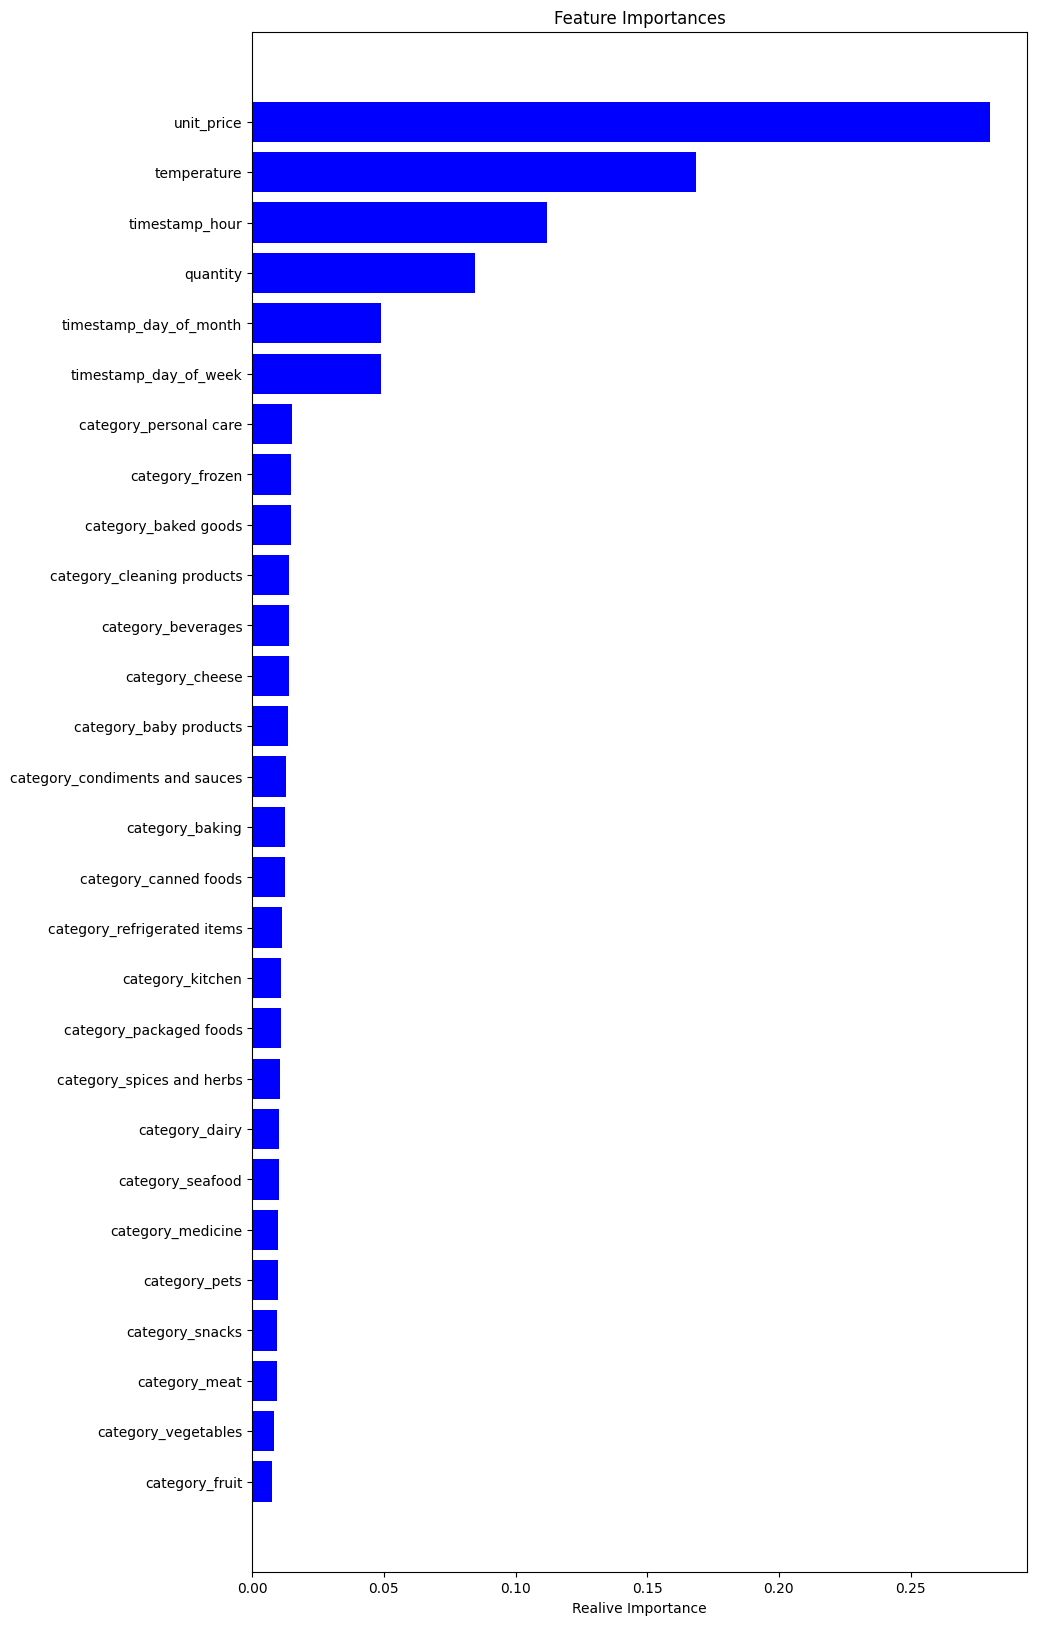

In [ ]:
features = [i.split("__")[0] for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Realive Importance')
plt.show()

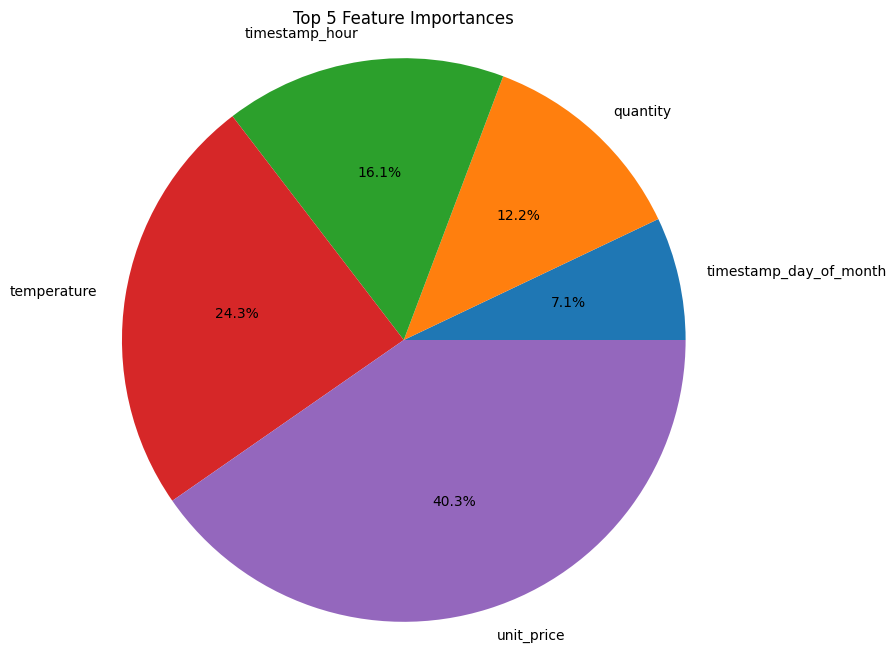

In [ ]:
# Extract top 5 feature names and importances
top_features = indices[-5:]  # Get indices of top 5 features
top_importances = importances[top_features]
top_feature_names = [features[i] for i in top_features]

# Create pie chart with improved readability
plt.figure(figsize=(8, 8))  # Adjust figure size for clarity
plt.pie(top_importances, labels=top_feature_names, autopct="%1.1f%%")
plt.title("Top 5 Feature Importances")
plt.axis("equal")  # Ensure circular pie chart
plt.show()


This feature importance visualisation tells us:

*   The product categories were not that importance
*   The unit price and temperature were importance in predicting stock
*   The hour of day was also important for  predicting stock

